In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/tmp/ipykernel_3583674/3743130169.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  qwen04_mean = qwen_04['LLM_most_likely_token'].value_counts(normalize=True)[1]
/tmp/ipykernel_3583674/3743130169.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cogito04_mean = cogito_04['LLM_most_likely_token'].value_counts(normalize=True)[1]
/tmp/ipykernel_3583674/3743130169.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  qwen06_mean =

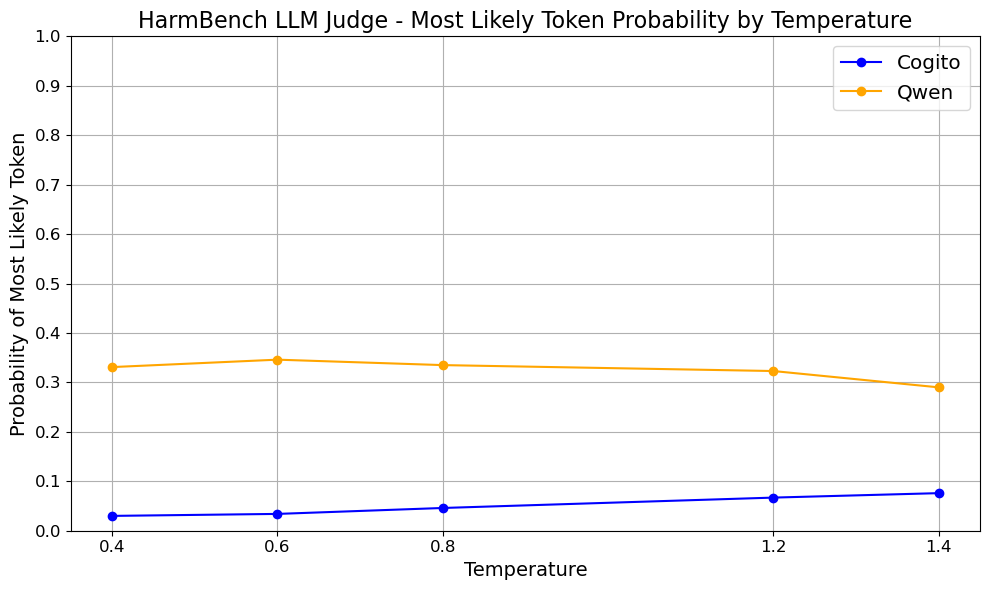

In [26]:
cogito_04 = pd.read_csv('Cogito_HarmBench_llm_judge_larger_context_samples_True_temperature_0.4_probs.csv')
qwen_04 = pd.read_csv('Qwen_HarmBench_llm_judge_larger_context_samples_True_temperature_0.4_probs.csv')
cogito_06 = pd.read_csv('Cogito_HarmBench_llm_judge_larger_context_samples_True_temperature_0.6_probs.csv')
qwen_06 = pd.read_csv('Qwen_HarmBench_llm_judge_larger_context_samples_True_temperature_0.6_probs.csv')
cogito_08 = pd.read_csv('Cogito_HarmBench_llm_judge_larger_context_samples_True_temperature_0.8_probs.csv')
qwen_08 = pd.read_csv('Qwen_HarmBench_llm_judge_larger_context_samples_True_temperature_0.8_probs.csv')
#cogito_10 = pd.read_csv('Cogito_HarmBench_llm_judge_larger_context_samples_True_temperature_1.0_probs.csv')
#qwen_10 = pd.read_csv('Qwen_HarmBench_llm_judge_larger_context_samples_True_temperature_1.0_probs.csv')
cogito_12 = pd.read_csv('Cogito_HarmBench_llm_judge_larger_context_samples_True_temperature_1.2_probs.csv')
qwen_12 = pd.read_csv('Qwen_HarmBench_llm_judge_larger_context_samples_True_temperature_1.2_probs.csv')
cogito_14 = pd.read_csv('Cogito_HarmBench_llm_judge_larger_context_samples_True_temperature_1.4_probs.csv')
qwen_14 = pd.read_csv('Qwen_HarmBench_llm_judge_larger_context_samples_True_temperature_1.4_probs.csv')
#cogito_16 = pd.read_csv('Cogito_HarmBench_llm_judge_larger_context_samples_True_temperature_1.6_probs.csv')
#qwen_16 = pd.read_csv('Qwen_HarmBench_llm_judge_larger_context_samples_True_temperature_1.6_probs.csv')
cogito_04.head()
qwen04_mean = qwen_04['LLM_most_likely_token'].value_counts(normalize=True)[1]
cogito04_mean = cogito_04['LLM_most_likely_token'].value_counts(normalize=True)[1]
qwen06_mean = qwen_06['LLM_most_likely_token'].value_counts(normalize=True)[1]
cogito06_mean = cogito_06['LLM_most_likely_token'].value_counts(normalize=True)[1]  
qwen08_mean = qwen_08['LLM_most_likely_token'].value_counts(normalize=True)[1]
cogito08_mean = cogito_08['LLM_most_likely_token'].value_counts(normalize=True)[1]
qwen12_mean = qwen_12['LLM_most_likely_token'].value_counts(normalize=True)[1]
cogito12_mean = cogito_12['LLM_most_likely_token'].value_counts(normalize=True)[1]
qwen14_mean = qwen_14['LLM_most_likely_token'].value_counts(normalize=True)[1]
cogito14_mean = cogito_14['LLM_most_likely_token'].value_counts(normalize=True)[1]
cogito_means = [cogito04_mean, cogito06_mean, cogito08_mean, cogito12_mean, cogito14_mean]
qwen_means = [qwen04_mean, qwen06_mean, qwen08_mean, qwen12_mean, qwen14_mean]
x = [0.4, 0.6, 0.8, 1.2, 1.4]
plt.figure(figsize=(10, 6))
plt.plot(x, cogito_means, marker='o', label='Cogito', color='blue')
plt.plot(x, qwen_means, marker='o', label='Qwen', color='orange')
plt.title('HarmBench LLM Judge - Most Likely Token Probability by Temperature', fontsize=16)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Probability of Most Likely Token', fontsize=14)
plt.xticks(x, fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=12)
plt.grid()
plt.legend(loc='upper right', fontsize='x-large')
plt.tight_layout()
plt.savefig('HarmBench_LLM_Judge_Most_Likely_Token_Probability_by_Temperature.pdf', dpi=300)
plt.show()



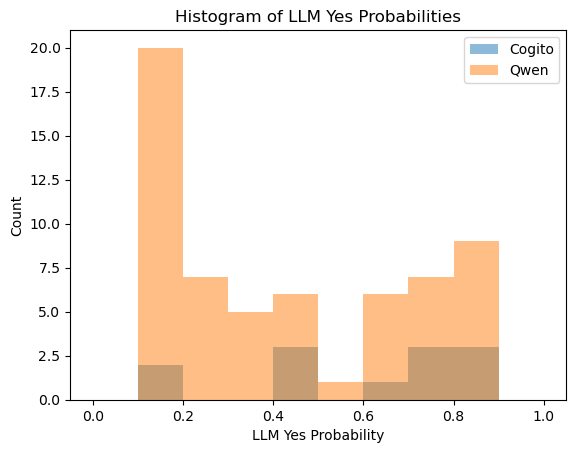

In [ ]:
print(qwen['LLM_yes_prob'].sum())  
print(qwen['LLM_no_prob'].sum()) 
print(cogito['LLM_yes_prob'].sum())  
print(cogito['LLM_no_prob'].sum()) 
cogito_filtered = cogito[(cogito['LLM_yes_prob'] > 0.1) & (cogito['LLM_yes_prob'] < 0.9)]
print('cogito uncertain instances:',cogito_filtered.shape[0])
qwen_filtered = qwen[(qwen['LLM_yes_prob'] > 0.1) & (qwen['LLM_yes_prob'] < 0.9)]
print('qwen uncertain instances:',qwen_filtered.shape[0])
print((qwen['LLM_yes_prob']>0.5).sum())
#histogram of llm yes prob in gaps of 0.1, alternating between Cogito and Qwen
plt.hist(cogito_filtered['LLM_yes_prob'], bins=np.arange(0, 1.1, 0.1), alpha=0.5, label='Cogito')

plt.hist(qwen_filtered['LLM_yes_prob'], bins=np.arange(0, 1.1, 0.1), alpha=0.5, label='Qwen')
plt.xlabel('LLM Yes Probability')
plt.ylabel('Count')
plt.legend()
plt.title('Histogram of LLM Yes Probabilities')
plt.show()